In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv('../datasets/df_with_scores.csv')

In [3]:
df.head()

,Protein change allele 1,Protein change allele 2,structure_allele1,structure_allele2,pdb_file_allele1,pdb_file_allele2,patient,sex,birth,bmi,...,KOOSsport,KOOS_QOL,HAQ_hapVAS,HAQ_haqDI,RMSD_A1,RMSD_all_A1,Alignment_A1,RMSD_A2,RMSD_all_A2,Alignment_A2
0,G161R,His371Profs,<Structure id=G161R>,<Structure id=His371Profs>,../datasets/ALPHAFOLD PDBs/G161R_c8ba5/G161R_c...,../datasets/ALPHAFOLD PDBs/H371fs_9b3dd/H371fs...,101A,F,1963.0,27.34,...,70.0,69.0,63.0,1.50,0.521,0.888,2314.8,0.648,0.853,1890.4
1,G161R,G161R,<Structure id=G161R>,<Structure id=G161R>,../datasets/ALPHAFOLD PDBs/G161R_c8ba5/G161R_c...,../datasets/ALPHAFOLD PDBs/G161R_c8ba5/G161R_c...,102A,F,1964.0,24.47,...,85.0,75.0,23.0,0.25,0.521,0.888,2314.8,0.521,0.888,2314.8
2,G161R,M368V,<Structure id=G161R>,<Structure id=M368V>,../datasets/ALPHAFOLD PDBs/G161R_c8ba5/G161R_c...,../datasets/ALPHAFOLD PDBs/M368V_be390/M368V_b...,105A,F,1958.0,33.98,...,0.0,19.0,53.0,1.75,0.521,0.888,2314.8,0.550,0.712,2315.2
3,G161R,G161R,<Structure id=G161R>,<Structure id=G161R>,../datasets/ALPHAFOLD PDBs/G161R_c8ba5/G161R_c...,../datasets/ALPHAFOLD PDBs/G161R_c8ba5/G161R_c...,107A,F,1952.0,26.29,...,25.0,13.0,70.0,2.00,0.521,0.888,2314.8,0.521,0.888,2314.8
4,G161R,G161R,<Structure id=G161R>,<Structure id=G161R>,../datasets/ALPHAFOLD PDBs/G161R_c8ba5/G161R_c...,../datasets/ALPHAFOLD PDBs/G161R_c8ba5/G161R_c...,108A,F,1956.0,27.18,...,35.0,13.0,71.0,1.88,0.521,0.888,2314.8,0.521,0.888,2314.8


In [4]:
df.columns

Index(['Protein change allele 1 ', 'Protein change allele 2',
       'structure_allele1', 'structure_allele2', 'pdb_file_allele1',
       'pdb_file_allele2', 'patient', 'sex', 'birth', 'bmi',
       'physical_health_score', 'mental_health_score', 'AKUSSI_jointpain',
       'AKUSSI_spinalpain', 'KOOSpain', 'KOOSsymptoms', 'KOOSdaily_living',
       'KOOSsport', 'KOOS_QOL', 'HAQ_hapVAS', 'HAQ_haqDI', 'RMSD_A1',
       'RMSD_all_A1', 'Alignment_A1', 'RMSD_A2', 'RMSD_all_A2',
       'Alignment_A2'],
      dtype='object')

In [5]:
X = df.drop([ 'AKUSSI_jointpain',
       'AKUSSI_spinalpain', 'KOOSpain', 'KOOSsymptoms', 'KOOSdaily_living',
       'KOOSsport', 'KOOS_QOL', 'HAQ_hapVAS', 'HAQ_haqDI', 'physical_health_score', 'mental_health_score','Protein change allele 1 ', 'Protein change allele 2',
       'structure_allele1', 'structure_allele2', 'pdb_file_allele1',
       'pdb_file_allele2', 'patient'], axis=1)

#replace M and F with 0 and 1
X['sex'].replace('M', -1, inplace=True)
X['sex'].replace('F', 1, inplace=True) 
X_orig = X.copy()   

In [6]:
y = df['physical_health_score']

In [7]:
X.columns

Index(['sex', 'birth', 'bmi', 'RMSD_A1', 'RMSD_all_A1', 'Alignment_A1',
       'RMSD_A2', 'RMSD_all_A2', 'Alignment_A2'],
      dtype='object')

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

In [10]:
# leave one out cross validation

from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, GridSearchCV, LeaveOneOut
k_fold = LeaveOneOut()
k_fold.get_n_splits(X_train, y_train)

exponents = np.arange(-15, -1)
parameters = {'alpha': 10.0**exponents}

grid = GridSearchCV(estimator=Ridge(), param_grid = parameters, cv=k_fold, scoring='neg_mean_squared_error')



In [11]:
# fit the model
grid.fit(X_train, y_train)


GridSearchCV(cv=LeaveOneOut(), estimator=Ridge(),
             param_grid={'alpha': array([1.e-15, 1.e-14, 1.e-13, 1.e-12, 1.e-11, 1.e-10, 1.e-09, 1.e-08,
       1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02])},
             scoring='neg_mean_squared_error')

In [12]:
# get the best model
best_model = grid.best_estimator_
best_model.fit(X_train, y_train)

Ridge(alpha=0.01)

In [13]:
y_pred = best_model.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse}, MAE: {mae}, R2: {r2}')

MSE: 63.65423867048298, MAE: 7.057400277538439, R2: 0.06974021561230781


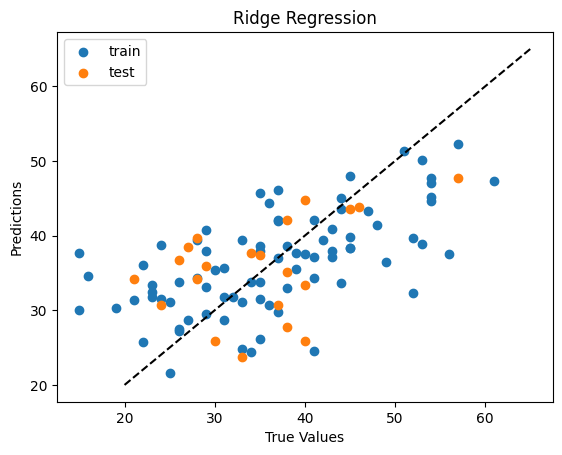

In [14]:
plt.scatter(y_train, best_model.predict(X_train),label='train')
plt.scatter(y_test, y_pred, label='test')

plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()
plt.title('Ridge Regression')

plt.plot(np.linspace(20, 65), np.linspace(20, 65), color='black', linestyle='--')

MSE: 59.45213333333333, MAE: 5.860000000000001, R2: 0.13115088812301157


(-3.25, 68.25, -3.25, 68.25)

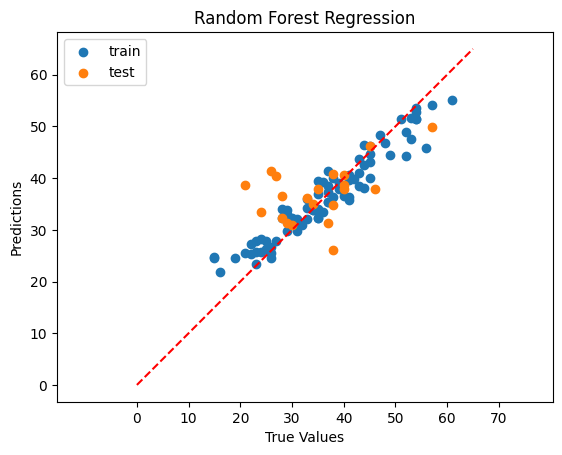

In [15]:
rf = RandomForestRegressor( criterion='squared_error')

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse}, MAE: {mae}, R2: {r2}')

plt.scatter(y_train, rf.predict(X_train),label='train')
plt.scatter(y_test, y_pred, label='test')

plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()
plt.title('Random Forest Regression')
plt.plot(np.linspace(0, 65), np.linspace(0, 65), color='r', linestyle='--')
plt.xticks(np.arange(0, 80,10))
plt.axis('equal')

In [20]:
import shap

explainer = shap.TreeExplainer(rf, X_train)

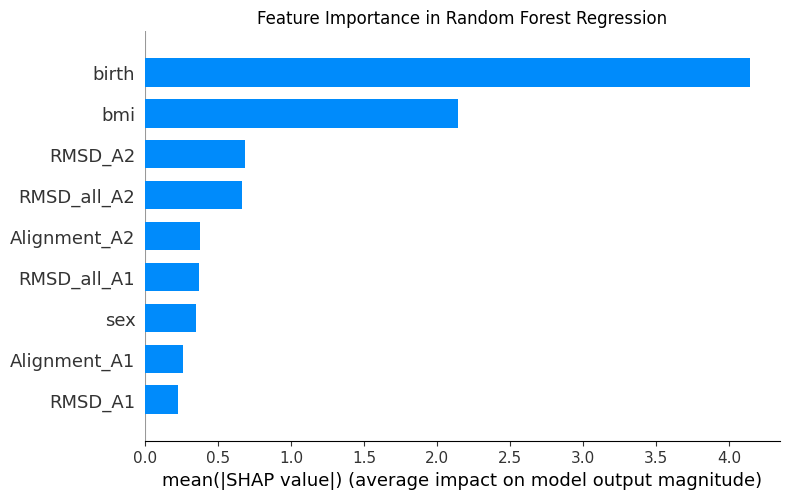

In [31]:
# calculate shap values
shap_values = explainer.shap_values(X_test, check_additivity=False)
plt.title('Feature Importance in Random Forest Regression')
shap.summary_plot(shap_values, X_test, feature_names=X_orig.columns, plot_type='bar')
# add title


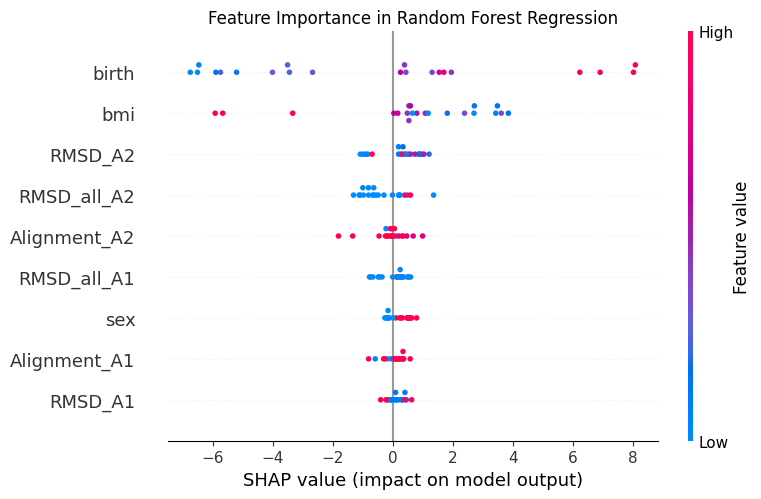

In [32]:
plt.title('Feature Importance in Random Forest Regression')
shap.summary_plot(shap_values, X_test, plot_type='dot', feature_names=X_orig.columns)